<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
df = pd.read_csv("Lab 11")

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,ConvertedCompYearly_Zscore,Log_ConvertedCompYearly,ExperienceLevel,ExperienceRange,TipoEmpleoAgrupado
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,...,Appropriate in length,Easy,65000.0,6.969466,0.003998,-0.067513,11.082158,Mid,0-5,Full time
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,Appropriate in length,Easy,65000.0,6.969466,0.003998,-0.067513,11.082158,Expert,10-20,Full time
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,Appropriate in length,Easy,65000.0,6.969466,0.003998,-0.067513,11.082158,Expert,20+,Full time
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Other...,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,Too long,Easy,65000.0,6.969466,0.003998,-0.067513,11.082158,Mid,0-5,Full time
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Other...,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,Too short,Easy,65000.0,6.969466,0.003998,-0.067513,11.082158,Mid,0-5,Full time


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_1212/2665132841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_industry.values, y = df_industry.index, palette = "viridis")


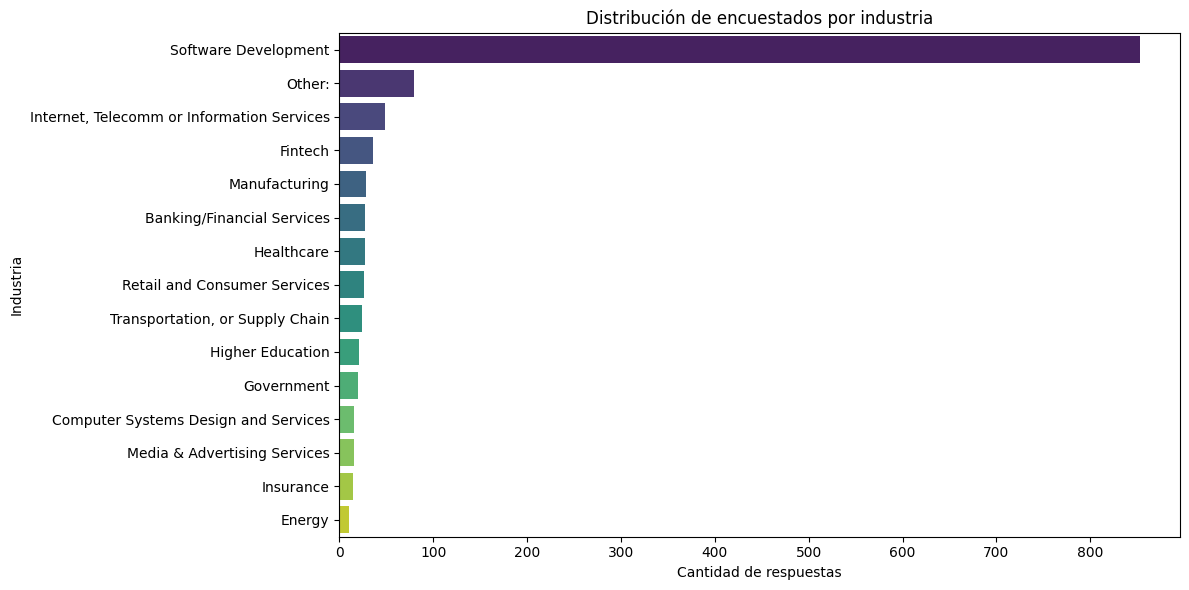

In [3]:
df_industry = df["Industry"].value_counts()
df_industry

plt.figure(figsize=(12,6))
sns.barplot(x = df_industry.values, y = df_industry.index, palette = "viridis")
plt.title("Distribución de encuestados por industria")
plt.xlabel("Cantidad de respuestas")
plt.ylabel("Industria")
plt.tight_layout()
plt.show()

In [4]:
### En este gráfico se observa que la mayoría de la población encuestada pertenece a la industria tecnológica, más precisamente al sector de desarrollo de software.

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [5]:
media = df['ConvertedCompYearly'].mean()
mediana = df['ConvertedCompYearly'].median()
desviacion = df['ConvertedCompYearly'].std()

print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")

Media: 78491.57
Mediana: 65000.00
Desviación estándar: 58427.54


In [6]:
umbral = media + 3 * desviacion
print(f"Umbral para compensaciones extremas: {umbral:.2f}")

Umbral para compensaciones extremas: 253774.19


In [7]:
compensaciones_altas = df[df['ConvertedCompYearly'] > umbral]
print(f"Cantidad de casos extremos: {len(compensaciones_altas)}")

Cantidad de casos extremos: 18


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [8]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

Q1 (25%): 65000.00
Q3 (75%): 65000.00
IQR: 0.00


In [9]:
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Límite inferior: {limite_inferior:.2f}")
print(f"Límite superior: {limite_superior:.2f}")

Límite inferior: 65000.00
Límite superior: 65000.00


In [10]:
outliers = df[(df['ConvertedCompYearly'] < limite_inferior) | (df['ConvertedCompYearly'] > limite_superior)]
print(f"Cantidad de outliers: {len(outliers)}")

Cantidad de outliers: 483


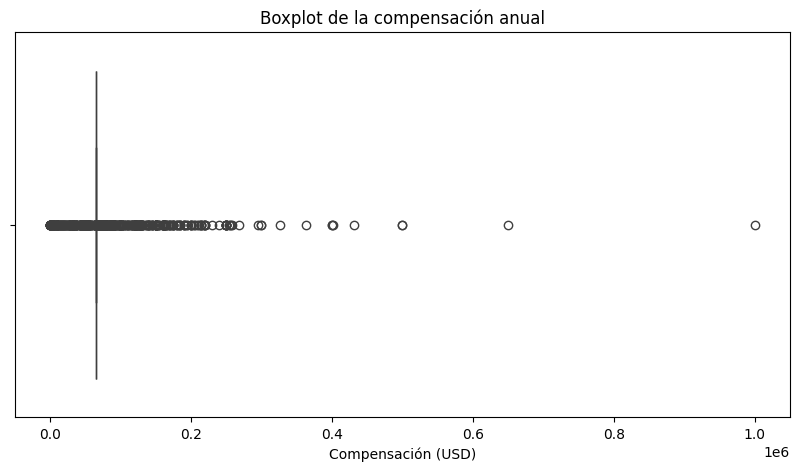

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Boxplot de la compensación anual')
plt.xlabel('Compensación (USD)')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [15]:
new_df = df[(df['ConvertedCompYearly'] >= limite_inferior) & (df['ConvertedCompYearly'] <= limite_superior)]
print(f"Filas originales: {len(df)}")
print(f"Filas sin outliers: {len(new_df)}")

Filas originales: 1248
Filas sin outliers: 764


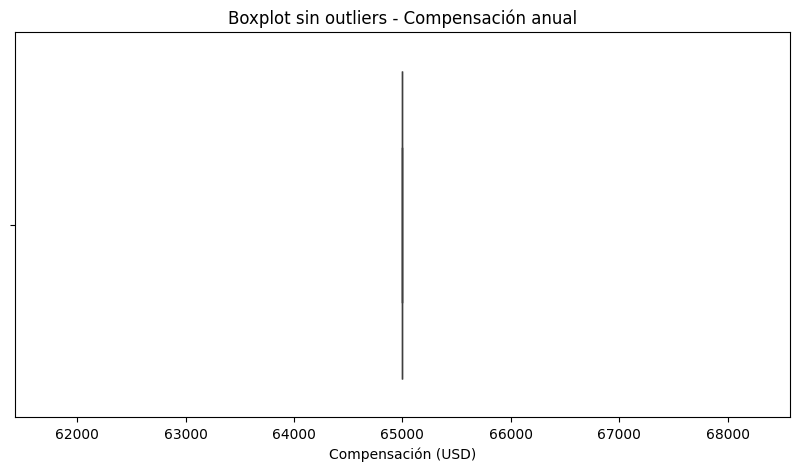

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=new_df['ConvertedCompYearly'])
plt.title('Boxplot sin outliers - Compensación anual')
plt.xlabel('Compensación (USD)')
plt.show()

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [17]:
import numpy as np

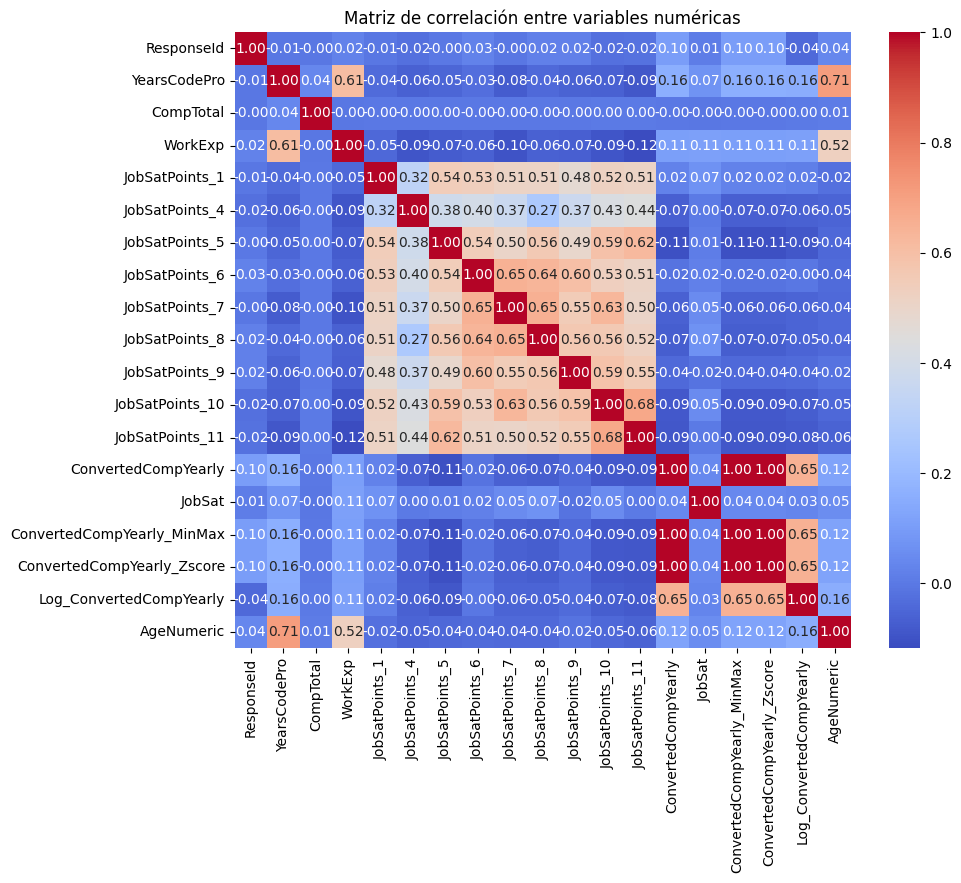

In [18]:
df["Age"] = df["Age"].replace('Prefer not to say', df["Age"].mode()[0])
df["Age"] = df["Age"].fillna(df["Age"].mode()[0])

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

df['AgeNumeric'] = df['Age'].map(age_map)

numeric_cols = df.select_dtypes(include='number')

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

In [17]:
df.to_csv("Lab 12.csv", index = False)

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
